In [46]:
# this is to plot inside the notebook
%matplotlib inline

# these are the libraries we are going to use
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# we are also going to use helper functions from the RM1985.py file
from RM1985 import *

matplotlib.style.use('seaborn-notebook')

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2222)

# Asssignment 1 Part 1

In this part of the assignment, we're going to replicate Rumelhart and McClelland RM (1985)'s model of the past tense (pictured below).
If you're itching to read the source paper, it's included in the Assignment 1 directory and may be a handy reference. We're going to walk through the necessary components here.

![](images/modelStructure.png)


## Encoding the input

Recall from lecture, the model uses a phonological representation called wickelfeatures. 

Words (e.g., came) are translated into phonemes (e.g., kAm).

Phonemes are converted into a binary code based on their articulatory features (see below).
Remember that in RM's model we use wickelphones (triplets of phonemes; e.g., #kA, kAm, Am#)

In [47]:
word_to_wickelphone('kAm')

[['0000000000', '1001000101', '0010110010'],
 ['1001000101', '0010110010', '1000110010'],
 ['0010110010', '1000110010', '0000000000']]

In practice, we also add a bit representing if a wickelphone touches a word boundary, resulting in an 11 bit code for each phoneme. You will not need the specifics of the code for this assignment.

Wickelphones are converted into wickelfeatures by taking one of the bits from the first phoneme in a wickelphone, one of the bits from the second phoneme, and one of the bits from the third. In theory then, there are 11 * 11 * 11 possible wickelfeatures. However, in practice a lot of these combinations are redundant and we can represent all informative combinations with 460 wickelfeatures. If you're really itching for the details they're in the paper.

Luckily, we have a helper function that will do all of this encoding for us: `activate_word`

In [48]:
activate_word('kAm')

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


We should check some properties of our encoding function. 

In order to do this we first have to translate some words (e.g., came) into phonemes (e.g. kAm). 

A lot of letters in English map directly onto their phoneme (e.g., b -> b) however, there are a few that don't (e.g., c as in *car* is represented by a k). The table below should help you translate words into phonemes (particularly the caption helps with vowels):

![](images/IPA.png)

<div class="alert alert-info" role="alert">
<h1>Exercise 1a)</h1>
<p>
Let's translate the ten high frequency words used in the paper: 

come/came, look/looked, feel/felt, have/had, make/made, get/got, give/gave, take/took, go/went, like/liked

(Points 3)
</p>
</div>



In [49]:
# save the phoneme representations of the base verb and past tense verb here
# keep the order in the quetion above: come, look, feel, have, make, get, give, take, go, like
high_frequency_verbs = ['come', 'look', 'feel', 'have', 'make', 'get', 'give', 'take', 'go', 'like']
base_high_frequency_verbs = ['k*m', 'luk', 'fEl', 'hav', 'mAk', 'get', 'giv', 'tAk', 'go', 'lIk']
past_high_frequency_verbs = ['kAm', 'lukt', 'felt', 'had', 'mAd', 'got', 'gAv', 'tuk', 'went', 'likt']

#raise NotImplementedError()

In [50]:
"""Check that translation was correct"""
for i, w in enumerate(high_frequency_verbs):
    print(w, 'Base:', activate_word(base_high_frequency_verbs[i]) == base_HF_activations[i])
    print(w, 'Past:', activate_word(past_high_frequency_verbs[i]) == past_HF_activations[i])

    

come Base: True
come Past: True
look Base: True
look Past: True
feel Base: True
feel Past: True
have Base: True
have Past: True
make Base: True
make Past: True
get Base: True
get Past: True
give Base: True
give Past: True
take Base: True
take Past: True
go Base: True
go Past: True
like Base: True
like Past: True


Now let's check some properties of our encoding function: `activate_word`

As mentioned above, there should be 460 wickelfeatures for each word. We can check this using `np.shape`

For a three phoneme word like *came*, we expect there to be at most 16 active wickelfeatures.

<div class="alert alert-info" role="alert">
<h1>Exercise 1b)</h1>
<p>
Store the shape of the wickelfeature represetation for *came* and the number of wickelfeatures activated (i.e., set to 1).
    
(Points 2)
</p>
</div>


In [51]:
# compute the shape and the number of active wickelfeatures here
came_activation = np.array(activate_word('kAm'))
came_shape = np.shape(came_activation)
came_number_active_wickelfeatures = 0
for i in came_activation:
    if i == 1:
        came_number_active_wickelfeatures += 1

    

# raise NotImplementedError()


In [52]:
"""Check the shape and number of active wickelfeatures is correct"""
assert(came_shape == (460,))
assert(came_number_active_wickelfeatures == 16)

 ## The Model
 
 Now that we have our input representations, we can work on the model implementation.
 
The goal RM's model is to output a wickelfeature representation for the past tense of the input verb. To do this, they build a perceptron for each of the 460 possible wickelfeatures. Each perceptron receieves the entire phonological representation of the base verb as input and decides if a single wickelfeature should be present in the output.

We have implemented the standard percepton model for you; however, there is one difference between a standard perceptron and the one's used by RM.

In the standard perceptron, a unit fires if the weighted activation `net` is greater than a threshold `theta`; otherwise it does not fire.

In RM's perceptron, a unit fires probabilistically according to the activation function:

$$ p(\text{fire}; net, \theta, T) =  \frac{1}{1 + e^{-(net-\theta)/T}} $$


<div class="alert alert-info" role="alert">
<h1>Exercise 2a)</h1>
<p>
Translate this function into code.

(Points 2)
</p>
</div>

Hint: the exponential function can be calculated using `np.exp()`


In [53]:
# translate the function here
#
def rm_activation_function(net, theta, T=1.0):
     probability = 1/(1+np.exp(-(net-theta)/T))
     return probability


#raise NotImplementedError()

In [54]:
"""Check the functions output"""
assert(rm_activation_function(0, 0.0) == 0.5)
assert(rm_activation_function(1., 0., 1.0) == 0.7310585786300049)
assert(rm_activation_function(2., 1., T=2.) == 0.6224593312018546)



At first glance, this function looks very similar to the logit function we talked about in week 3's tutorial but what does that `T` parameter do? 

Let's vizualize it.

<div class="alert alert-info" role="alert">
<h1>Exercise 2b)</h1>
<p>
Let's set `theta = 0.0` and plot the probability of firing as a function of the the weighted activation `net` at `T=1.0`, `T=0.5` and `T=2.0` in one figure. We should consider weighted activation values between -5 and 5.

(Points 5)
</p>
</div>

For full credit you should:

- Plot the probability of firing (Y-axis) as a function of weighted activation, net, (X-axis) on the same plot (choose distinguishable colors please).
- Set labels for both axes.
- Set a title for the figure.
- Set the plot to span (0, 1) for the y-axis and and (-5, 5) for the x-axis
- Set a legend indicating how colors map to values of T


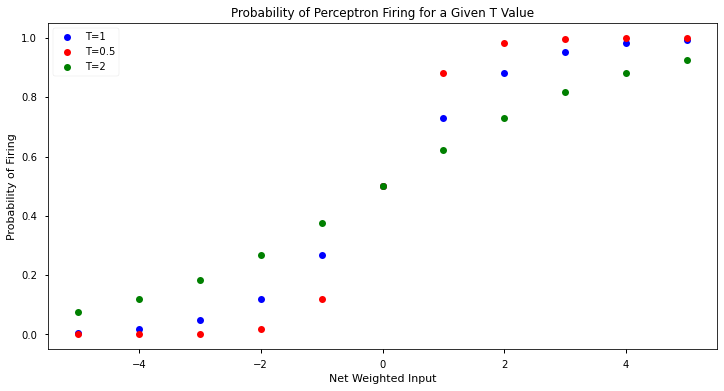

In [55]:
# calculate and plot the probability of firing at different T values

net_activation = np.arange(-5, 6)
p_T1 = rm_activation_function(net_activation, theta=0.0, T=1.0)
p_T05 = rm_activation_function(net_activation, theta=0.0, T=0.5)
p_T2 = rm_activation_function(net_activation, theta=0.0, T=2.0)

plt.figure(num = 1, figsize = [12,6])
plt.title("Probability of Perceptron Firing for a Given T Value")
plt.xlabel("Net Weighted Input")
plt.ylabel("Probability of Firing")
plt.plot(net_activation, p_T1, "bo", label = "T=1")
plt.plot(net_activation, p_T05, "ro", label = "T=0.5")
plt.plot(net_activation, p_T2, "go", label = "T=2")
plt.legend()
#

#raise NotImplementedError()

<div class="alert alert-info" role="alert">
<h1>Exercise 2c)</h1>
<p>
Discuss how this activation function differs from the standard perceptron activation function. (max 5 sentences)

(Points 2)
</p>
</div>



The standard perceptron function outputs a boolean true/false (or 1/0), whereas the above function returns a continuous probability of firing. A standard perceptron outputs 1/0 value as returned by a step function, whereas the function used above is a sigmoid function. 

# U Shaped Curves

Recall from lecture that RM used this model to demonstrate a developmental U-shape curve.

First they trained the model on ten high frequency words (8 irregular, 2 regular), then medium frequency verbs, then low frequency verbs. They then plotted the percent of wickelfeatures the model correctly predicted for irregular and regular verbs as the model saw more data. 

Let's replicate this step by step :)

First, let's load in a corpus of English verbs.

In [56]:
# read in the corpus

verbs = []
with open('verbs.csv') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            print(line.strip('\n').split(','))
        else:
            verbs.append(line.strip('\n').split(','))
            print(verbs[-1])

# add in the high frequency verbs you translated for us earlier
for i, word in enumerate(high_frequency_verbs):
    if word in ['look', 'like']:
        verbs.append([word, 'Regular', base_high_frequency_verbs[i], past_high_frequency_verbs[i], 'H'])
    else:
        verbs.append([word, 'Irregular', base_high_frequency_verbs[i], past_high_frequency_verbs[i], 'H'])
    print(verbs[-1])


['Verb', 'Type', 'Base', 'Past', 'Frequency']
['act', 'Regular', 'akt', 'akted', 'M']
['age', 'Regular', 'Aj', 'Ajd', 'M']
['air', 'Regular', 'Ar', 'Ard', 'M']
['arise', 'Irregular', '*rIz', '*rOz', 'M']
['ask', 'Regular', 'ask', 'askt', 'M']
['back', 'Regular', 'bak', 'bakt', 'M']
['bear', 'Irregular', 'bAr', 'bor', 'M']
['beat', 'Irregular', 'bEt', 'bEt', 'M']
['become', 'Irregular', 'bEk*m', 'bEkAm', 'M']
['believe', 'Regular', 'b*lEv', 'b*lEvd', 'M']
['bend', 'Irregular', 'bend', 'bent', 'L']
['bid', 'Irregular', 'bid', 'bid', 'L']
['bleed', 'Irregular', 'blEd', 'bled', 'M']
['blow', 'Irregular', 'blO', 'blU', 'M']
['board', 'Regular', 'bord', 'borded', 'M']
['brake', 'Irregular', 'brAk', 'brOk', 'M']
['breed', 'Irregular', 'brEd', 'bred', 'L']
['bring', 'Irregular', 'briN', 'brot', 'M']
['brown', 'Regular', 'brWn', 'brWnd', 'L']
['build', 'Irregular', 'bild', 'bilt', 'M']
['buy', 'Irregular', 'bI', 'bot', 'M']
['call', 'Regular', 'kol', 'kold', 'M']
['carp', 'Regular', 'karp', 'ka

- The first column denotes the verb.
- The second column denotes whether the verb is regular or irregular.
- The third column denotes the phoneme representation of the base verb.
- The fourth column denotes the phoneme representation of the past tense verb.
- The last column denotes the verb's frequency (M: Medium or L: Low)

## First Stage: High Frequency Verbs

In the first stage, RM trained the model on the high frequency verbs.

Let's do that.

First we need to convert the phonemes into wickelfeatures.

In [57]:
base_wickel_HF = np.array([activate_word(w) for w in base_high_frequency_verbs]).T
past_wickel_HF = np.array([activate_word(w) for w in past_high_frequency_verbs]).T

Next we initialize a perceptron with our custom activation function

In [58]:
percept = Perceptron(active=rm_activation_function)

Now let's do the perceptron learning algorithm for each high frequency word (i.e. one epoch).

By default, the `Perceptron.learn()` will return the model accuracy on the data, which we measure as the percentage of the wickelfeatures the model correctly predicts.

In [59]:
percept.learn(base_wickel_HF, past_wickel_HF)

array([0.97173913, 0.94782609, 0.93695652, 0.97173913, 0.95652174,
       0.96956522, 0.95      , 0.96304348, 0.84347826, 0.93043478])

We can also score the perceptron, using `Perceptron.score()`. 

In [60]:
percept.score(base_wickel_HF, past_wickel_HF)

array([0.9673913 , 0.95434783, 0.94347826, 0.9673913 , 0.95869565,
       0.97391304, 0.9673913 , 0.96304348, 0.87173913, 0.92826087])

So after one epoch, the perceptron performs well on the verbs it has seen already. 

How will the perceptron perform on all the irregular and regular verbs, including the ones it has not seen yet?

<div class="alert alert-info" role="alert">
<h1>Exercise 3a)</h1>
<p>
Now let's divide the corpus `verbs` into two lists: one for regular verbs and one for irregular verbs.

(Points 2)    
</p>
</div>

Hint: You may want to use a `for` loop over `verbs`


In [61]:
# store the two sets here
#
regular_verbs = []
irregular_verbs = []

for verb in verbs:
    if verb[1] == 'Regular':
        regular_verbs.append(verb)
    else:
        irregular_verbs.append(verb)

#raise NotImplementedError()

In [62]:
assert(len(regular_verbs) == 96)
assert(len(irregular_verbs) == 96)

Now let's score the perceptron's performance on both the regular and irregular verbs.

<div class="alert alert-info" role="alert">
<h1>Exercise 3b)</h1>
<p>
First convert the phonemes for base and past tense into wickelfeatures. Then calculate the mean score of the model on irregular and regular verbs.
    
(Points 3)</p>
</div>

Hint: Look back to how we coverted phonemes into wickelfeatures above.


In [63]:
# convert irregular and regular verbs into wickelfeatures
#
base_wickel_irregular = np.array([activate_word(verb[2]) for verb in irregular_verbs]).T
past_wickel_irregular = np.array([activate_word(verb[3]) for verb in irregular_verbs]).T
base_wickel_regular = np.array([activate_word(verb[2]) for verb in regular_verbs]).T
past_wickel_regular = np.array([activate_word(verb[3]) for verb in regular_verbs]).T

irregular_score = np.mean(percept.score(base_wickel_irregular, past_wickel_irregular))
regular_score = np.mean(percept.score(base_wickel_regular, past_wickel_regular))

print(irregular_score)
print(regular_score)

#raise NotImplementedError()

0.9142889492753623
0.8748188405797102


In [64]:
assert(irregular_score == 0.9142889492753623)
assert(regular_score == 0.8748188405797102)

So far we've trained the model in batch, which means it has seen all the data once before we score it.

Let's train the model one data point at a time and score it after each datapoint

In [65]:
# Let's initialize a new perceptron with our custom activation function
percept = Perceptron(active=rm_activation_function)


# Now let's loop through each data point to train and score
scores_regular = []
scores_irregular = []
for i in range(len(high_frequency_verbs)):
    percept.learn(base_wickel_HF[:,i, np.newaxis], past_wickel_HF[:,i,np.newaxis])
    scores_regular.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
    print(scores_regular[-1], scores_irregular[-1])


0.6128396739130434 0.6086050724637682
0.6739583333333333 0.6753396739130434
0.7203577898550725 0.7194972826086957
0.7453577898550724 0.7426177536231884
0.7697463768115943 0.7745471014492754
0.7841485507246378 0.7931385869565216
0.7971693840579709 0.8102355072463768
0.8057291666666666 0.8263813405797102
0.8115489130434783 0.8335371376811594
0.8201766304347826 0.8421875000000001


<div class="alert alert-info" role="alert">
<h1>Exercise 3c)</h1>
<p>
Explain the model output. So far, do we replicate RM? Do we expect to get the same result if we rerun the model? (7 sentences max)
    
(Points 3)</p>
</div>

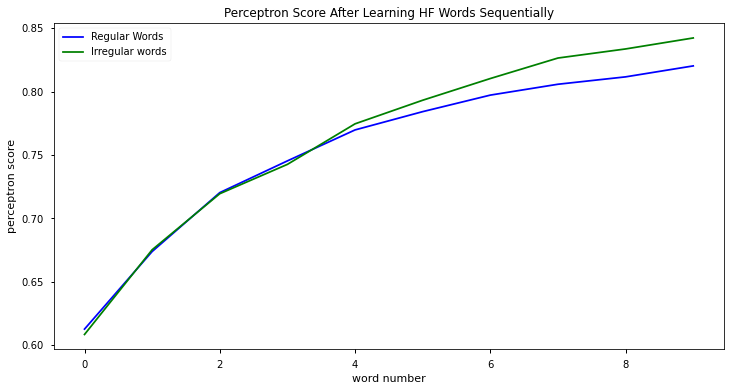

In [66]:
plt.figure(num = 2, figsize = [12,6])
plt.plot(range(len(scores_regular)), scores_regular, "b-", label = "Regular Words")
plt.plot(range(len(scores_irregular)), scores_irregular, "g-", label = "Irregular words")
plt.xlabel("word number")
plt.ylabel("perceptron score")
plt.title("Perceptron Score After Learning HF Words Sequentially")
plt.legend()

So far, we do replicate RM. This is because the plot above represents the initial stage of childhood word learning, prior to the U-shape curve. In this stage, childrens' ability to correctly predict the past tense of all words increases monotonically as they train on high-frequency words. Additionally, the fact that the perceptron score for irregular words comes out on top of regular words supports RM's empirical observation that children learn irregular words first. We expect the same results when we rerun the model because the training data, perceptron function and comparison data do not change. 

## Second Stage: Medium Frequency Verbs

Recall, in the second stage of the U-Shape curve, RM train the model with medium frequency verbs. Let's do it!

<div class="alert alert-info" role="alert">
<h1>Exercise 4a)</h1>
<p>
First, we need to extract the medium frequency verbs from the corpus `verbs`.
    
(Points 1)</p>
</div>


In [67]:
# store the medium frequency verbs here
#
base_med_frequency_verbs = []
past_med_frequency_verbs = []

for verb in verbs:
    if verb [-1] == "M":
        base_med_frequency_verbs.append(verb[2])
        past_med_frequency_verbs.append(verb[3])

#raise NotImplementedError()

In [68]:
assert(len(base_med_frequency_verbs) == 150)
assert(len(past_med_frequency_verbs) == 150)

<div class="alert alert-info" role="alert">
<h1>Exercise 4b)</h1>
<p>
Second, we need to convert those those verbs into wickelfeatures.
    
(Points 2)</p>
</div>


In [69]:
# convert the verbs into wickelfeatures
#
base_wickel_MF = np.array([activate_word(verb) for verb in base_med_frequency_verbs]).T
past_wickel_MF = np.array([activate_word(verb) for verb in past_med_frequency_verbs]).T

# YOUR CODE HERE
#raise NotImplementedError()

Now, we need to loop through each data point to train and score, like we just did for the high frequency verbs.

<div class="alert alert-info" role="alert">
<h1>Exercise 4c)</h1>
<p>
Calculate and store the scores for regular and irregular verbs in the variables `scores_irregular_md` and `scores_regular_md`.
    
(Points 2)</p>
</div>


In [70]:
# loop through the medium frequency verbs to train and score the model here
#
scores_regular_md = []
scores_irregular_md = []
for i in range(len(base_med_frequency_verbs)):
    percept.learn(base_wickel_MF[:,i, np.newaxis], past_wickel_MF[:,i,np.newaxis])
    scores_regular_md.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular_md.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
    print(scores_regular_md[-1], scores_irregular_md[-1])


#raise NotImplementedError()

0.8268342391304347 0.8441802536231883
0.8344202898550726 0.8514266304347826
0.8392210144927538 0.8594655797101449
0.8400135869565216 0.8624547101449277
0.8431838768115942 0.8668251811594203
0.8454483695652173 0.8644021739130435
0.8525362318840579 0.8736413043478262
0.8541666666666666 0.8765625
0.8431838768115941 0.8606431159420289
0.8374320652173912 0.8484601449275363
0.8459918478260869 0.8670063405797102
0.8525588768115943 0.8776268115942029
0.8588541666666668 0.8673686594202898
0.8606657608695653 0.8708786231884057
0.8590579710144928 0.877717391304348
0.8642436594202899 0.8889945652173914
0.8668251811594203 0.8891304347826088
0.8712182971014494 0.8941123188405796
0.8591711956521738 0.871988224637681
0.864447463768116 0.8835597826086956
0.8689990942028984 0.8877717391304346
0.8665081521739131 0.8831295289855072
0.8699048913043478 0.8820878623188406
0.8742980072463767 0.8846693840579709
0.8748641304347826 0.8857336956521739
0.8671648550724638 0.8740262681159421
0.8787590579710144 0.881

In [71]:
assert(scores_regular_md[-1] == 0.9333333333333332 )
assert(scores_irregular_md[-1] == 0.9447690217391305)

## Third Stage: Low Frequency Verbs

In the third stage of the U-Shape curve, RM train the model with low frequency verbs. One last time then :)

<div class="alert alert-info" role="alert">
<h1>Exercise 4d)</h1>
<p>
First, we need to extract the low frequency verbs from the corpus `verbs`.
    
(Points 1)</p>
</div>

In [72]:
base_low_frequency_verbs = []
past_low_frequency_verbs = []

for verb in verbs:
    if verb [-1] == "L":
        base_low_frequency_verbs.append(verb[2])
        past_low_frequency_verbs.append(verb[3])

# YOUR CODE HERE
#raise NotImplementedError()

In [73]:
assert(len(base_low_frequency_verbs) == 32)
assert(len(past_low_frequency_verbs) == 32)

<div class="alert alert-info" role="alert">
<h1>Exercise 4e)</h1>
<p>
Second, we need to convert those those verbs into wickelfeatures.
    
(Points 2)</p>
</div>


In [74]:
# convert the verbs into wickelfeatures
#
base_wickel_LF = np.array([activate_word(verb) for verb in base_low_frequency_verbs]).T
past_wickel_LF = np.array([activate_word(verb) for verb in past_low_frequency_verbs]).T

# YOUR CODE HERE
#raise NotImplementedError()

Finally, we need to loop through each data point to train and score.

<div class="alert alert-info" role="alert">
<h1>Exercise 4f)</h1>
<p>
Calculate and store the scores for regular and irregular verbs in the variables `scores_irregular_low` and `scores_regular_low`.
    
(Points 2)</p>
</div>


In [75]:
# loop through the low frequency verbs to train and score the model here
#
scores_regular_low = []
scores_irregular_low = []
for i in range(len(base_low_frequency_verbs)):
    percept.learn(base_wickel_LF[:,i, np.newaxis], past_wickel_LF[:,i,np.newaxis])
    scores_regular_low.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular_low.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
    print(scores_regular_low[-1], scores_irregular_low[-1])

# YOUR CODE HERE
#raise NotImplementedError()

0.9320652173913043 0.9478940217391304
0.9317708333333332 0.9497735507246375
0.9328577898550724 0.9474864130434782
0.9306385869565217 0.9476902173913043
0.9353940217391304 0.9471240942028986
0.9341485507246375 0.9482110507246376
0.934782608695652 0.9472599637681159
0.933582427536232 0.9479393115942031
0.9344202898550725 0.9483242753623188
0.9350543478260871 0.9482110507246376
0.9323369565217391 0.9505661231884056
0.9377264492753623 0.9491168478260869
0.9384057971014492 0.94861865942029
0.9387907608695653 0.9470788043478261
0.938473731884058 0.9482336956521739
0.9393115942028986 0.9487092391304349
0.9405570652173915 0.9497961956521738
0.9404664855072463 0.9480978260869565
0.9404891304347824 0.9460144927536233
0.9435914855072465 0.9448822463768116
0.9430932971014494 0.9459918478260869
0.9431159420289855 0.9459465579710145
0.9434103260869565 0.9456295289855073
0.9433197463768117 0.943455615942029
0.9435235507246377 0.9455389492753624
0.9445425724637682 0.9468297101449276
0.9426177536231884

In [76]:
assert(scores_regular_low[0] == 0.9320652173913043)
assert(scores_irregular_low[0] == 0.9478940217391304)
assert(scores_regular_low[-1] == 0.9432065217391304)
assert(scores_irregular_low[-1] == 0.9518795289855072)

## Putting it all together

<div class="alert alert-info" role="alert">
<h1>Exercise 5a)</h1>
<p>
Let's see how well we replicated the U-Shape pattern by plotting the simulation output.
    
(Points 5)</p>
</div>

For full credit your code should:

- Plot the percent of correct wickelfeatures (Y-axis) as a function of the amount of datapoints trained on for both regular and irregular verbs (use distinct colors please).
- Plot dashed vertical lines at 10 and 160 data points to demarcate the three different time periods.
- Set labels for both axes.
- Set a title for the figure.
- Set the plot to span (0.5, 1) for the y-axis and and (0, 192) for the x-axis
- Set a legend indicating how colors map to verb type

Hint: to concatenate two lists into a bigger list you can use the following syntax:
`big_list = one_list + another_list`


### I am assuming that percept.score() returns % of correct wickelfeatures, since in RM1985.py, there is a comment in line 46 that .score() "returns the percent of correct output nodes". This is different to how sklearn's score function works, so I hope I'm not wrong :).

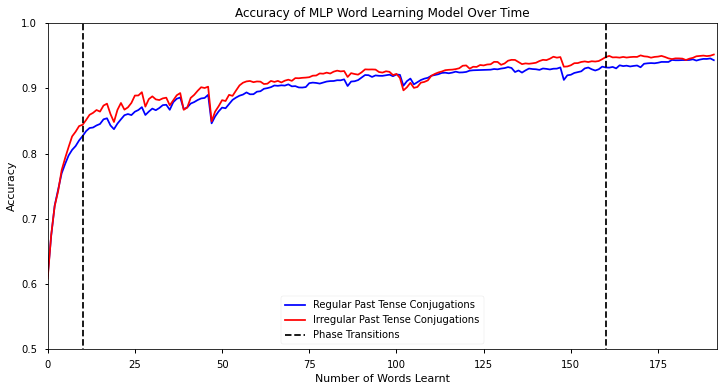

In [81]:
#Making hf scores follow the convention
scores_regular_HF = scores_regular
scores_irregular_HF = scores_irregular

#Creating list of accuracies across all frequencies for regular and irregular words.
regular_words_accuracies = scores_regular_HF + scores_regular_md + scores_regular_low
irregular_words_accuracies = scores_irregular_HF + scores_irregular_md + scores_irregular_low

#Creating Plot
xvals = range(len(regular_words_accuracies))
plt.figure(num = 3, figsize = [12,6])
plt.title("Accuracy of MLP Word Learning Model Over Time")
plt.plot(xvals, regular_words_accuracies, "b-", label = "Regular Past Tense Conjugations")
plt.plot(xvals, irregular_words_accuracies, "r-", label = "Irregular Past Tense Conjugations")
plt.plot([10,10], [0,2], "k--", label = "Phase Transitions")
plt.plot([160,160], [0,2], "k--")
xpos_midfreq = len(scores_regular_HF) + 1
xpos_lowfreq = len(scores_regular_HF) + len(scores_regular_md) + 1
plt.xlim(0,192)
plt.ylim(0.5,1)
plt.xlabel("Number of Words Learnt")
plt.ylabel("Accuracy")
plt.legend()

#raise NotImplementedError()

<div class="alert alert-info" role="alert">
<h1>Exercise 5b)</h1>
<p>

1) Did we replicate RM's U-shaped curve? Why or why not? Be specific.

2) Do you believe this model is a fair model of children's acquisition? Why or why not? Be specific.
    
(Points 7)</p>
</div>

For each question make no more than three specific arguments. We will only mark the first three. Feel free to bullet your points. This is not an essay.

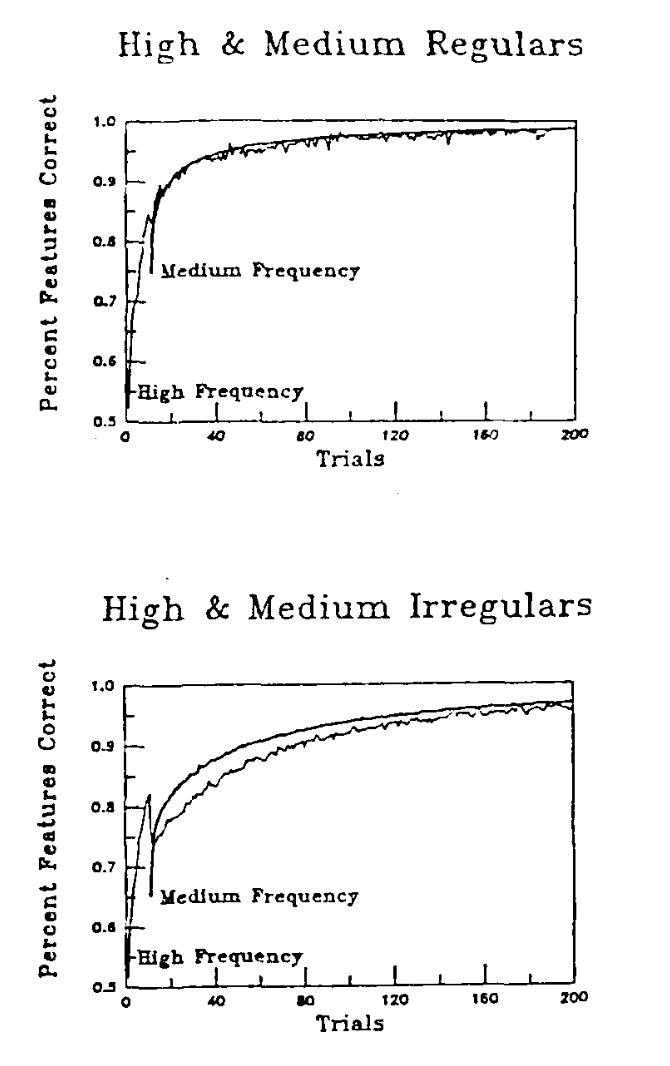

1. The python implemented MLP model replicates some features of the RM1985 model, one of which is mentioned below, but differs from the RM1985 model in many other features, two of which are stated below. I thus conclude that it is not an accurate representation of the RM1985 model.

--The implemented model replicates the substantial dip from the trend of accuracy increase found in the RM1985 paper after medium frequency words are introduced. In the implemented model, this dip can be found at ~50 data points.

--However, in the RM1985 model, the dip shortly after medium frequency words are introduced, whereas in the implemented model this dip occurs after ~40 medium frequency words are introduced.

--Furthermore, only two dips can be seen in the RM1985 model - one after high frequency words are introduced, and one after medium frequency words are introduced. However, in the implemented model, no dips are observed in the high frequency region, and at least four dips are observed in the medium frequency region (at ~20 words, ~50 words, ~100 words and ~150 words). 

2. Below I have stated how the implemented model is similar to the U-shaped idea of a child's word learning. The model recreates some aspects of a child's learning, but differs significantly in others. I would say it the implemented model provides a good high-level prediction of childrens' word learning, but is far from authoritative.

-- When the implemented model is learning its first past tense words, its accuracy increases dramatically, just like a child's would.

-- When the implemented model is learning medium frequency past tense words, auxiliary drops in accuracy occur between ~20 and ~45 words, and a more substantial is dip is noticed around ~50 words. The model is correct in predicting that a drop would occur, but a child's accuracy would only drop once, more signficantly than the drop around ~50 words.

--Once a child has experienced this drop in accuracy, there would be no further significant drops, whereas in the implemented model, smaller drops can be noticed around ~100 and ~150 words.